In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import os

## Some EDA

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
print(df['review'][3])
print('')
print('Sentiment:',df['sentiment'][3])

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.

Sentiment: negative


In [5]:
# Check for balanced dataset
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
# Negative example
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [7]:
# Positive example
df['review'][9]

'If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!'

## Pre-processing: Tokenize, Stopwords, Lemmatize, etc.

#### ~~Encode the labels~~

In [8]:
# le = LabelEncoder()

In [9]:
# df['enc_sent'] = le.fit_transform(df['sentiment']) # pos = 1, neg = 0

In [10]:
# df.head()

#### Remove html coding

In [11]:
df['review'] = df['review'].str.replace('<.*?>','')

#### Remove all puncuation and symbols

In [12]:
df['review'] = df['review'].str.replace('[^\w\s]','')

#### Make everything lower case

In [13]:
df['review'] = df['review'].str.lower()

#### Remove stop words

In [14]:
import spacy
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words
# # After seeing the word counts, update stop words
sp.Defaults.stop_words |= {'movie', 'film', 'like'}

In [15]:
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

#### Tokenize

In [16]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [17]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [18]:
df['lemma_review'] = df.review.apply(lemmatize_text)

In [19]:
df['review'][0]

'reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe thing struck oz brutality unflinching scenes violence set right word trust faint hearted timid pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements far awayi main appeal fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess episode saw struck nasty surreal couldnt ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order away mannered middle class inmates turned prison bitches lack street skills prison experience watchi

In [20]:
print(df['lemma_review'][0])

['reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'awayi', 'main', 'appeal', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romanceoz', 'doesnt', 'mess', 'episode', 'saw', 'stru

In [21]:
df.head()

,review,sentiment,lemma_review
0,reviewers mentioned watching 1 oz episode youl...,positive,"[reviewer, mentioned, watching, 1, oz, episode..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,negative,"[basically, there, family, little, boy, jake, ..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


## Prepare for LDA

Code from this section was referenced from the follow sites:
* https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html#constructing-a-document-term-matrix
* https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [22]:
from gensim import corpora, models
import gensim
from pprint import pprint

In [23]:
dictionary = corpora.Dictionary(df['lemma_review'])

In [24]:
corpus = [dictionary.doc2bow(text) for text in df['lemma_review']]

In [25]:
# Build LDA model
num_topics=10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"scene" + 0.006*"character" + 0.005*"love" + 0.005*"time" + '
  '0.005*"good" + 0.004*"film" + 0.004*"movie" + 0.004*"way" + 0.004*"life" + '
  '0.004*"know"'),
 (1,
  '0.010*"good" + 0.008*"time" + 0.007*"story" + 0.005*"great" + '
  '0.005*"character" + 0.004*"know" + 0.004*"people" + 0.004*"year" + '
  '0.004*"film" + 0.004*"dont"'),
 (2,
  '0.009*"bad" + 0.006*"movie" + 0.006*"dont" + 0.005*"time" + 0.005*"good" + '
  '0.005*"character" + 0.005*"story" + 0.004*"great" + 0.004*"watch" + '
  '0.004*"think"'),
 (3,
  '0.008*"time" + 0.006*"good" + 0.005*"dont" + 0.005*"people" + '
  '0.004*"horror" + 0.004*"scene" + 0.004*"thing" + 0.004*"bad" + 0.004*"seen" '
  '+ 0.004*"plot"'),
 (4,
  '0.006*"character" + 0.005*"time" + 0.004*"life" + 0.004*"story" + '
  '0.004*"good" + 0.003*"war" + 0.003*"plot" + 0.003*"actor" + '
  '0.003*"performance" + 0.002*"scene"'),
 (5,
  '0.008*"time" + 0.006*"good" + 0.006*"great" + 0.006*"character" + '
  '0.005*"story" + 0.005*"best" + 0.

## Plotting

In [26]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import seaborn as sns

In [27]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))

# # this is a bit xtime consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

# LDAvis_prepared

In [34]:
pyLDAvis.display(LDAvis_prepared)

In [29]:
# vis = pyLDAvis.gensim.prepare(topic_model=lda_model, 
#                               corpus=corpus, 
#                               dictionary=dictionary)
# pyLDAvis.enable_notebook()
# pyLDAvis.show(vis)

In [30]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i, 12)) for i in range(num_topics)}

In [31]:
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(35, 10)
(10, 35)


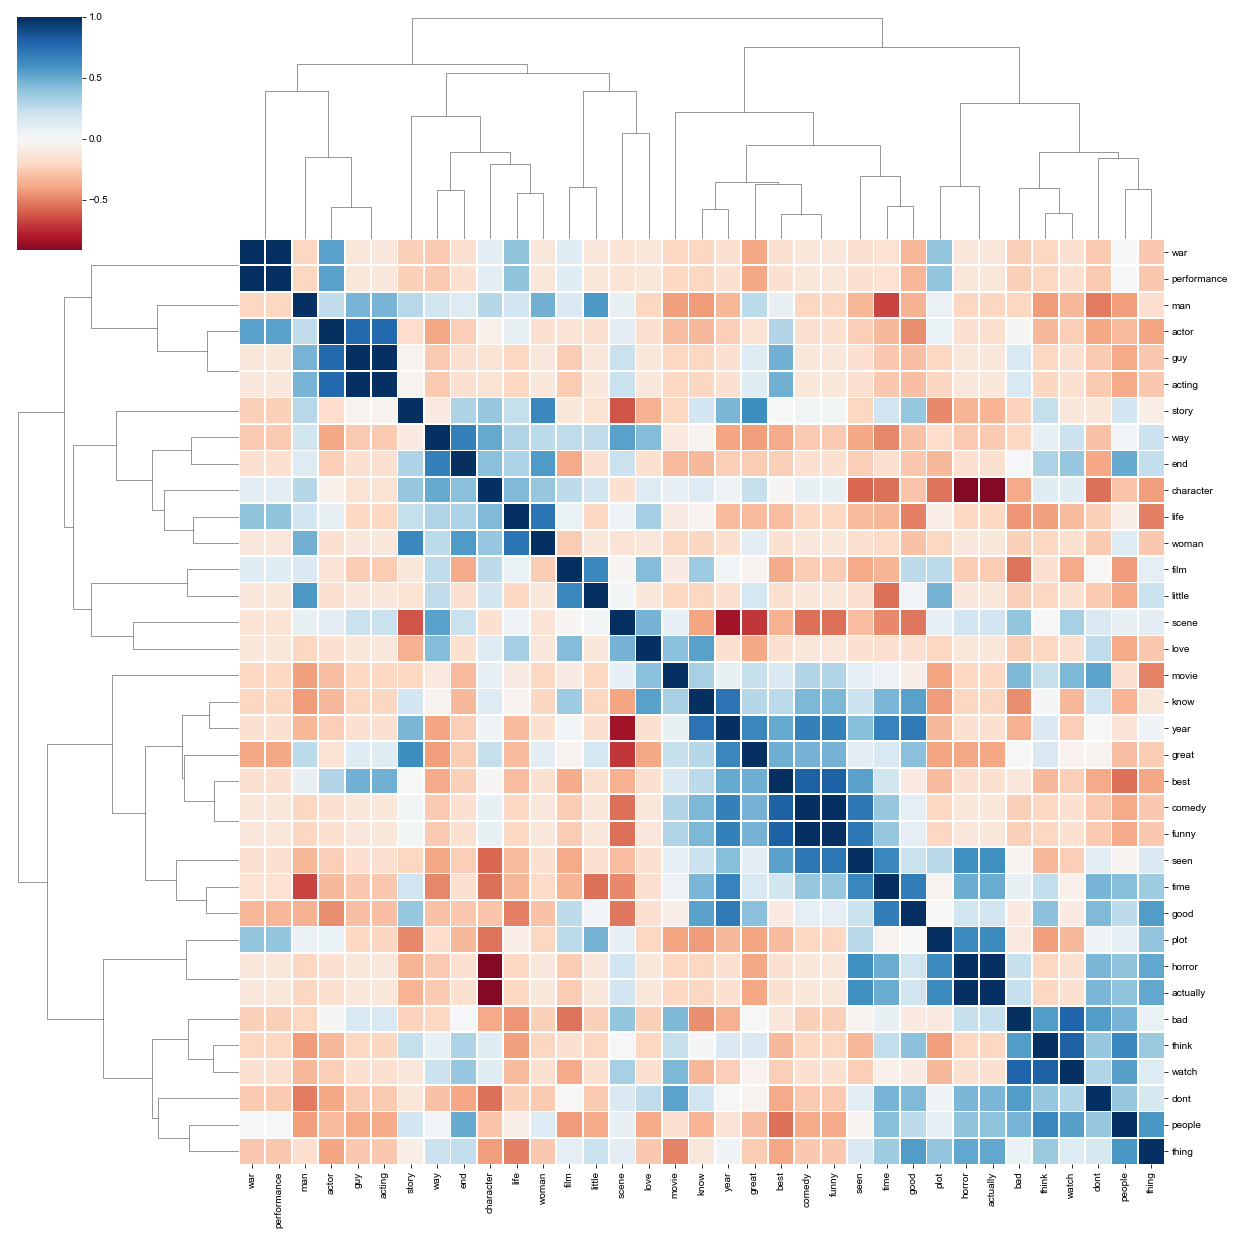

In [32]:
g = sns.clustermap(df_lda.corr(), center=0, cmap='RdBu', metric='cosine', linewidth=0.75, annot_kws={"size": 24}, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
fig = plt.gcf()
sns.set(font_scale=2.0)
fig.set_size_inches(18, 18)
plt.savefig('lda_clustermap_IMDB.png')
plt.show()